Sample mean vs population

<ipython-input-4-15ca0c6742f4>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_mean_calculator(x, 30, 1000))
<ipython-input-4-15ca0c6742f4>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: xlabel='Vehicle Speed', ylabel='Probability'>

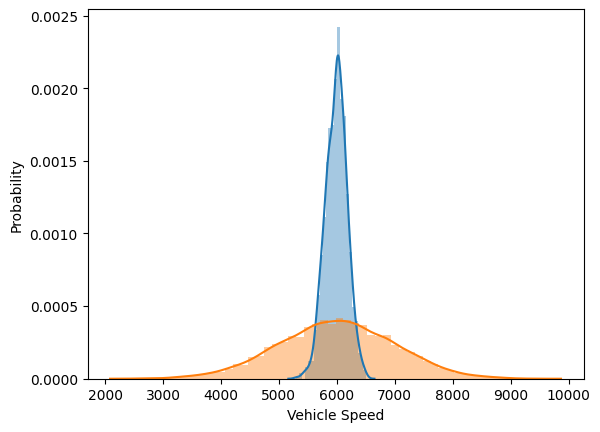

In [4]:
# Book Figure 7-3

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat

x = np.random.normal(6000, 1000, size=10000)
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    z = sample_means.append(sample_mean)
  return sample_means
sns.distplot(sample_mean_calculator(x, 30, 1000))
plt.xlabel('Vehicle Speed')
plt.ylabel('Probability')
sns.distplot(x)

Central Limit Theorem (CLT) check

In [ ]:
# Book Figures 7-5 and 7-6

from scipy.stats import shapiro
print("Mean of Sample Mean:", np.mean(sample_mean_calculator(x, 30, 1000)))
print("Standard Deviation of Sample Mean:", np.std(sample_mean_calculator(x, 30, 1000)))
shapiro(sample_mean_calculator(x, 30, 1000))

Distribution fit

In [ ]:
# Book Figure 7-8

%pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(sample_mean_calculator(x, 30, 1000),
           distributions= get_common_distributions())
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')
plt.xlabel('Vehicle Speed')
plt.ylabel('Probability')

Skewed distribution check for CLT




In [ ]:
# Book Figure 7-11

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skewnorm
from scipy.stats import shapiro

s = skewnorm.rvs(12, size=10000)
sns.distplot(s)
print('Mean of population:', np.mean(s))
print('Standard deviation of population:',np.std(s))
print("Mean of sample mean:", np.mean(sample_mean_calculator(s, 30, 1000)))
print("Standard deviation of sample mean:", np.std(sample_mean_calculator(s, 30, 1000)))
plt.xlabel('X')
_ = sns.distplot(sample_mean_calculator(s, 30, 1000))
shapiro(sample_mean_calculator(s, 30, 1000))

Two-peak distribution check for CLT


In [ ]:
# Book Figure 7-12

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro

m = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 4.0, size=10000)))
_ = sns.distplot(m)
print('Mean of population:', np.mean(m))
print('Standard deviation of population:',np.std(m))
print("Mean of sample mean:", np.mean(sample_mean_calculator(m, 30, 1000)))
print("Standard deviation of sample mean:", np.std(sample_mean_calculator(m, 30, 1000)))
plt.xlabel('X')

_ = sns.distplot(sample_mean_calculator(m, 30, 1000))
shapiro(sample_mean_calculator(m, 30, 1000))

CLT application in proabaility calculation

In [ ]:
# Book Figure 7-13

import scipy.stats as st
print("Probability of sample mean between +/- 5% of population mean: ", st.norm.cdf(6300,loc=6000,scale=1000/30**0.5)-st.norm.cdf(5700,loc=6000,scale=1000/30**0.5))
print("85 percentile of sample mean : ", st.norm.ppf(0.85,loc=6000,scale=1000/30**0.5))

Interval Estimation

In [37]:
# Book Figure 7-16

import numpy as np
import scipy.stats as stats
import random
import math

population_ages = stats.norm.rvs(30, 5, size=10000)
sample_size = 30
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()
print("Sample Mean:",sample.mean())

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence interval:")
print(confidence_interval)

Sample Mean: 28.729706970932103
z-critical value:
1.959963984540054
Confidence interval:
(26.938654509999953, 30.520759431864253)
